In [23]:
import pandas as pd 
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
import random
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import tensorflow as tf
import torch
import torch.nn as nn
import torch.optim as optim
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
import matplotlib.pyplot as plt
import pandas as pd

## 1ST TEST

### Task 1

Data Preprocessing with scikit-learn 

Creating dummy data

In [ ]:

# Define possible routes
routes = ['A-B', 'B-C', 'C-D', 'D-E', 'E-F', 'F-G', 'G-H', 'H-I', 'I-J']

# Generate random data
np.random.seed(42)  # For reproducibility
data = {
    'route': [random.choice(routes) if random.random() > 0.05 else np.nan for _ in range(250)],
    'shipment_time': [round(random.uniform(2.0, 6.0), 1) if random.random() > 0.05 else np.nan for _ in range(250)],
    'distance': [random.randint(80, 250) if random.random() > 0.05 else np.nan for _ in range(250)]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Display first few rows
print("Sample Data (First 10 rows):")
print(df.head(10))

# Save to CSV
df.to_csv('shipment_data.csv', index=False)


Sample Data (First 10 rows):
  route  shipment_time  distance
0   NaN            3.3     167.0
1   H-I            4.3      83.0
2   I-J            2.8     151.0
3   A-B            3.8     109.0
4   A-B            4.2     223.0
5   A-B            4.7      92.0
6   B-C            5.0       NaN
7   I-J            2.9      88.0
8   F-G            4.3     163.0
9   G-H            2.7     201.0


In [10]:


df = pd.read_csv('shipment_data.csv')
print("Original Data:")
print(df.head())

# Step 2: Handle missing values (forward fill)
df.fillna(method='ffill', inplace=True)

# Step 3: Encode categorical variable 'route'
label_encoder = LabelEncoder()
df['route'] = label_encoder.fit_transform(df['route'])

# Step 4: Normalize numerical features
scaler = StandardScaler()
df[['shipment_time', 'distance']] = scaler.fit_transform(df[['shipment_time', 'distance']])

print("\nPreprocessed Data:")
print(df.sample(10))


Original Data:
  route  shipment_time  distance
0   NaN            3.3     167.0
1   H-I            4.3      83.0
2   I-J            2.8     151.0
3   A-B            3.8     109.0
4   A-B            4.2     223.0

Preprocessed Data:
     route  shipment_time  distance
142      7       1.278450  0.590955
6        1       0.827148 -1.566886
97       2       1.188190 -1.252637
60       2      -0.436500  1.701301
112      8      -0.707282 -1.713535
181      3      -1.248845 -0.624140
197      6      -0.617021 -1.168838
184      1       1.639492 -0.749839
9        6      -1.248845  0.716655
104      1       0.285584 -1.147888


C:\Users\PC\AppData\Local\Temp\ipykernel_21112\1062058312.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


### Task 2
Model Training with scikit-learn

In [12]:
# Step 5: Split features and target
X = df[['route', 'distance']]
y = df['shipment_time']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 7: Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"📉 Mean Squared Error: {mse:.4f}")


📉 Mean Squared Error: 0.9076


### Task 3

In [ ]:
# Define the neural network architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# Evaluate the model on the test set
loss = model.evaluate(X_test, y_test)
print(f"📉 TensorFlow NN Mean Squared Error on Test Set: {loss:.4f}")


Epoch 1/50


c:\Users\PC\anaconda3\envs\test\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - loss: 1.0607 - val_loss: 1.0874
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.9606 - val_loss: 1.0790
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 1.0735 - val_loss: 1.0708
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 1.0047 - val_loss: 1.0613
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 1.0663 - val_loss: 1.0745
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 1.0289 - val_loss: 1.0610
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.9917 - val_loss: 1.0586
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 1.0594 - val_loss: 1.0584
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.9576 - val_loss: 1.0565
Epoch 10/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 1.0269 - val_loss: 1.0523
Epoch 11/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 1.0235 - val_loss: 1.0477
Epoch 12/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 1.0244 - val_loss: 1.0483
Epoch 13/50


### Task 4

In [15]:
df1 = df.copy()
dates = pd.date_range(start="2023-01-01", periods=len(df1), freq='D')
df1['date'] = dates
df1['distruption'] = np.random.choice([0, 1], size=len(df1), p=[0.8, 0.2])  # 20% disruptions

In [ ]:
# --- Step 2: Create Dummy External Weather Data ---
weather_conditions = ['clear', 'rainy', 'stormy', 'foggy', 'snowy']
weather_data = pd.DataFrame({
    'date': dates,
    'weather': np.random.choice(weather_conditions, size=250)
})

# Fill missing values if any
weather_data.fillna(method='ffill', inplace=True)

# Encode weather condition
label_encoder = LabelEncoder()
weather_data['weather_encoded'] = label_encoder.fit_transform(weather_data['weather'])

# --- Step 3: Merge Shipment and Weather Data ---
merged_data = pd.merge(df1, weather_data, on='date')


C:\Users\PC\AppData\Local\Temp\ipykernel_21112\2267315254.py:14: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  weather_data.fillna(method='ffill', inplace=True)


In [17]:
merged_data

,route,shipment_time,distance,date,distruption,weather,weather_encoded
0,9,-0.707282,0.004358,2023-01-01,0,rainy,2
1,7,0.195324,-1.755435,2023-01-02,0,foggy,1
2,8,-1.158584,-0.330841,2023-01-03,0,foggy,1
3,0,-0.255979,-1.210738,2023-01-04,0,stormy,4
4,0,0.105063,1.177553,2023-01-05,1,foggy,1
...,...,...,...,...,...,...,...
245,5,-0.346239,-0.896489,2023-09-03,0,foggy,1
246,7,0.646626,-1.713535,2023-09-04,1,rainy,2
247,3,1.458971,1.114703,2023-09-05,0,snowy,3
248,1,-0.165718,1.030903,2023-09-06,0,clear,0


In [19]:
# --- Step 4: Prepare Dataset for PyTorch ---
X = merged_data[['route', 'distance', 'weather_encoded']].values
y = merged_data['distruption'].values

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

In [20]:

# --- Step 5: Define the PyTorch Model ---
class DisruptionPredictor(nn.Module):
    def __init__(self):
        super(DisruptionPredictor, self).__init__()
        self.fc1 = nn.Linear(X_train.shape[1], 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))
        return x

model = DisruptionPredictor()

In [22]:
# --- Step 6: Train the Model ---
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

for epoch in range(100):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train).squeeze()
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    if (epoch + 1) % 10 == 0:
        print(f'Epoch {epoch + 1}, Loss: {loss.item():.4f}')

# --- Step 7: Evaluate the Model ---
model.eval()
with torch.no_grad():
    outputs = model(X_test).squeeze()
    predictions = (outputs > 0.5).float()
    accuracy = (predictions == y_test).float().mean()
    print(f"\n✅ Accuracy on Test Set: {accuracy.item() * 100:.2f}%")


Epoch 10, Loss: 0.4829
Epoch 20, Loss: 0.4756
Epoch 30, Loss: 0.4709
Epoch 40, Loss: 0.4665
Epoch 50, Loss: 0.4627
Epoch 60, Loss: 0.4585
Epoch 70, Loss: 0.4542
Epoch 80, Loss: 0.4497
Epoch 90, Loss: 0.4450
Epoch 100, Loss: 0.4403

✅ Accuracy on Test Set: 84.00%


### Task 5
Time Series Forecasing

In [31]:
# --- Step 1: Generate dummy shipment_time data (250 days)
np.random.seed(42)
dates = pd.date_range(start="2023-01-01", periods=250, freq='D')
shipment_times = np.random.normal(loc=4.0, scale=1.0, size=len(dates))  # simulated times

df2 = pd.DataFrame({
    'date': dates,
    'shipment_time': shipment_times
})

# --- Step 2: Normalize the shipment time
scaler = StandardScaler()
data = scaler.fit_transform(df2['shipment_time'].values.reshape(-1, 1))

# --- Step 3: Create sequences for LSTM
def create_dataset(data, time_step=10):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 10
X, y = create_dataset(data, time_step)
X = X.reshape(X.shape[0], X.shape[1], 1)

# --- Step 4: Train-test split
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


In [32]:
# --- Step 5: Define LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(time_step, 1)),
    LSTM(50, return_sequences=False),
    Dense(25),
    Dense(1)
])

# Compile model
model.compile(optimizer='adam', loss='mse')

# Train model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# --- Step 6: Evaluate model
loss = model.evaluate(X_test, y_test)
print(f"\n📉 Mean Squared Error on Test Set: {loss:.4f}")



Epoch 1/50


c:\Users\PC\anaconda3\envs\test\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 164ms/step - loss: 0.9959 - val_loss: 0.8739
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 1.0873 - val_loss: 0.8943
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.9276 - val_loss: 0.9087
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.8885 - val_loss: 0.9203
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.8619 - val_loss: 0.9202
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.8821 - val_loss: 0.9242
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.8945 - val_loss: 0.9165
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.8837 - val_loss: 0.9223
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.9318 - val_loss: 0.9266
Epoch 10/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 1.0564 - val_loss: 0.9123
Epoch 11/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.9365 - val_loss: 0.9077
Epoch 12/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.9480 - val_loss: 0.9083
Epoch 13/50

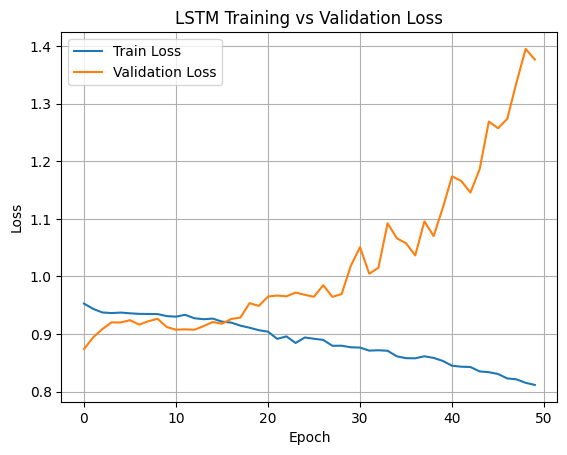

In [33]:
# Plot Loss Curve
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('LSTM Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

### Task 6

In [3]:
# --- Step 1: Preprocess Images ---
datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    validation_split=0.2
)

train_generator = datagen.flow_from_directory(
    'package_images/',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    'package_images/',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

Found 467 images belonging to 2 classes.
Found 115 images belonging to 2 classes.


In [4]:
# --- Step 2: Define CNN Architecture ---
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])

# --- Step 3: Compile the Model ---
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


c:\Users\PC\anaconda3\envs\test\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [41]:
from PIL import Image

In [5]:
# --- Step 4: Train the Model ---
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator
)


c:\Users\PC\anaconda3\envs\test\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20


c:\Users\PC\anaconda3\envs\test\Lib\site-packages\PIL\Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


15/15 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.5325 - loss: 1.2388 - val_accuracy: 0.4696 - val_loss: 0.7091
Epoch 2/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 8s 526ms/step - accuracy: 0.6097 - loss: 0.6375 - val_accuracy: 0.6609 - val_loss: 0.5914
Epoch 3/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 8s 509ms/step - accuracy: 0.7775 - loss: 0.4948 - val_accuracy: 0.7565 - val_loss: 0.5386
Epoch 4/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 8s 537ms/step - accuracy: 0.8446 - loss: 0.3738 - val_accuracy: 0.7826 - val_loss: 0.5086
Epoch 5/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 8s 523ms/step - accuracy: 0.8363 - loss: 0.3628 - val_accuracy: 0.6696 - val_loss: 0.7819
Epoch 6/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 8s 527ms/step - accuracy: 0.8950 - loss: 0.2503 - val_accuracy: 0.7652 - val_loss: 0.6124
Epoch 7/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 8s 517ms/step - accuracy: 0.9164 - loss: 0.2048 - val_accuracy: 0.6783 - val_loss: 1.0508
Epoch 8/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 8s 510ms/step - accuracy: 0.9067 - loss: 0.2340 - val_accuracy: 0.7304 - val_lo

In [6]:
# --- Step 5: Evaluate the Model ---
loss, accuracy = model.evaluate(validation_generator)
print(f"\n✅ Validation Accuracy: {accuracy * 100:.2f}%")

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 278ms/step - accuracy: 0.7134 - loss: 2.0452

✅ Validation Accuracy: 73.91%


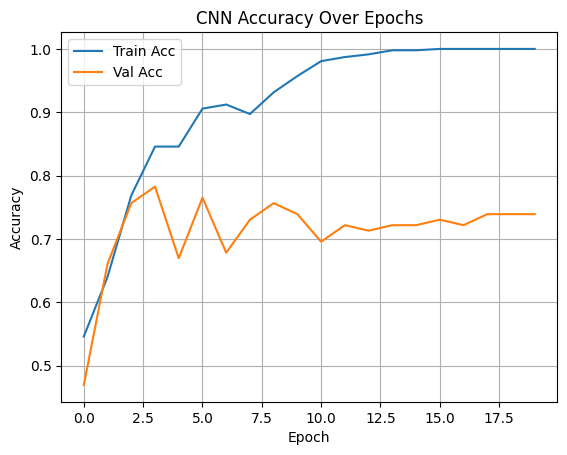

In [ ]:
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('CNN Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


### Task 7

In [ ]:
# Step 1: Generate Dummy Shipment Data
np.random.seed(42)
data = pd.DataFrame({
    'shipment_time': np.random.normal(loc=4.0, scale=0.5, size=100),
    'distance': np.random.normal(loc=150, scale=20, size=100)
})

# Inject some 5 anomalies
for _ in range(5):
    data.loc[np.random.randint(0, 100), 'shipment_time'] = np.random.uniform(8, 10)
    data.loc[np.random.randint(0, 100), 'distance'] = np.random.uniform(300, 400)

# Step 2: Normalize the Data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Step 3: Define Autoencoder Model
input_dim = scaled_data.shape[1]
encoding_dim = 2

input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
decoded = Dense(input_dim, activation='sigmoid')(encoded)

autoencoder = Model(input_layer, decoded)
encoder = Model(input_layer, encoded)

In [10]:
# --- Step 4: Compile and Train ---
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(scaled_data, scaled_data, epochs=50, batch_size=16, validation_split=0.2, verbose=0)

In [11]:
# --- Step 5: Compute Reconstruction Errors ---
reconstructions = autoencoder.predict(scaled_data)
mse = np.mean(np.square(scaled_data - reconstructions), axis=1)

# --- Step 6: Set Threshold and Identify Anomalies ---
threshold = np.percentile(mse, 95)  # top 5% as anomalies
anomalies = mse > threshold

print(f"Total Data Points: {len(data)}")
print(f"Number of Anomalies Detected: {np.sum(anomalies)}")


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Total Data Points: 100
Number of Anomalies Detected: 5


In [12]:
# Add results to DataFrame
data['reconstruction_error'] = mse
data['anomaly'] = anomalies

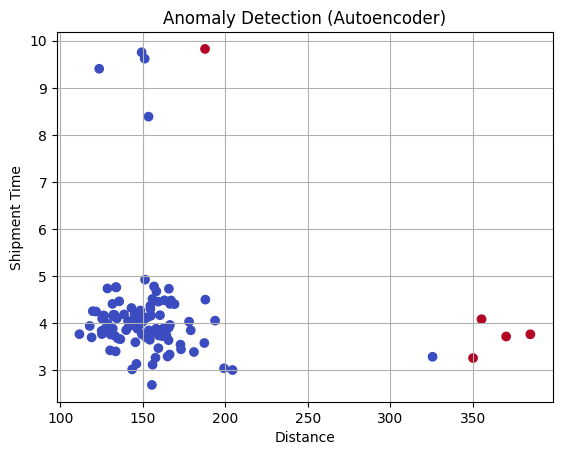

In [ ]:
# Visualize
plt.scatter(data['distance'], data['shipment_time'], c=anomalies, cmap='coolwarm')
plt.xlabel('Distance')
plt.ylabel('Shipment Time')
plt.title('Anomaly Detection (Autoencoder)')
plt.grid(True)
plt.show()

### Task 8


In [25]:
# step 1: load the dataset
df_fleet = pd.read_csv('vehicle_maintenance_data.csv')
df_fleet.head()

,Vehicle_Model,Mileage,Maintenance_History,Reported_Issues,Vehicle_Age,Fuel_Type,Transmission_Type,Engine_Size,Odometer_Reading,Last_Service_Date,Warranty_Expiry_Date,Owner_Type,Insurance_Premium,Service_History,Accident_History,Fuel_Efficiency,Tire_Condition,Brake_Condition,Battery_Status,Need_Maintenance
0,Truck,58765,Good,0,4,Electric,Automatic,2000,28524,2023-11-23,2025-06-24,Second,20782,6,3,13.622204,New,New,Weak,1
1,Van,60353,Average,1,7,Electric,Automatic,2500,133630,2023-09-21,2025-06-04,Second,23489,7,0,13.625307,New,New,Weak,1
2,Bus,68072,Poor,0,2,Electric,Automatic,1500,34022,2023-06-27,2025-04-27,First,17979,7,0,14.306302,New,Good,Weak,1
3,Bus,60849,Average,4,5,Petrol,Automatic,2500,81636,2023-08-24,2025-11-05,Second,6220,7,3,18.709467,New,Worn Out,New,1
4,Bus,45742,Poor,5,1,Petrol,Manual,2000,97162,2023-05-25,2025-09-14,Third,16446,6,2,16.977482,Good,Good,Weak,1


In [28]:
df_fleet.isnull().sum()

Vehicle_Model           0
Mileage                 0
Maintenance_History     0
Reported_Issues         0
Vehicle_Age             0
Fuel_Type               0
Transmission_Type       0
Engine_Size             0
Odometer_Reading        0
Last_Service_Date       0
Warranty_Expiry_Date    0
Owner_Type              0
Insurance_Premium       0
Service_History         0
Accident_History        0
Fuel_Efficiency         0
Tire_Condition          0
Brake_Condition         0
Battery_Status          0
Need_Maintenance        0
dtype: int64

In [29]:
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

# Step 1: Define categorical and numerical columns
categorical_cols = ['Vehicle_Model', 'Maintenance_History', 'Fuel_Type',
                    'Transmission_Type', 'Owner_Type', 'Tire_Condition',
                    'Brake_Condition', 'Battery_Status']
numerical_cols = ['Mileage', 'Reported_Issues', 'Vehicle_Age', 'Engine_Size',
                  'Odometer_Reading', 'Insurance_Premium', 'Service_History',
                  'Accident_History', 'Fuel_Efficiency']

# Step 2: Prepare the pipeline
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_cols),
    ('cat', Pipeline([
        ('label', LabelEncoder())  # Note: LabelEncoder doesn't work in ColumnTransformer directly
    ]), categorical_cols)  # Will fix this below
], remainder='drop')

# Since LabelEncoder doesn't work directly in ColumnTransformer, encode categoricals manually first
df_encoded = df_fleet.copy()
for col in categorical_cols:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])



In [31]:
# Step 3: Separate features and target
X = df_encoded[numerical_cols + categorical_cols]
y = df_encoded['Need_Maintenance']



In [33]:
# Step 4: Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 5: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

# Step 6: Define the deep learning model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification output
])

# Step 7: Compile and train
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=8, validation_split=0.2, verbose=1)


Epoch 1/10


c:\Users\PC\anaconda3\envs\test\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3750/3750 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.8949 - loss: 0.2274 - val_accuracy: 0.9860 - val_loss: 0.0436
Epoch 2/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9917 - loss: 0.0268 - val_accuracy: 0.9956 - val_loss: 0.0122
Epoch 3/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - accuracy: 0.9988 - loss: 0.0060 - val_accuracy: 0.9997 - val_loss: 0.0028
Epoch 4/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - accuracy: 0.9993 - loss: 0.0023 - val_accuracy: 1.0000 - val_loss: 8.9342e-04
Epoch 5/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - accuracy: 0.9994 - loss: 0.0022 - val_accuracy: 1.0000 - val_loss: 4.3604e-04
Epoch 6/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - accuracy: 0.9999 - loss: 5.6315e-04 - val_accuracy: 0.9987 - val_loss: 0.0034
Epoch 7/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9997 - loss: 6.2848e-04 - val_accuracy: 1.0000 - val_loss: 8.2921e-05
Epoch 8/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9997 - 

In [34]:
# Step 8: Evaluate and predict
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int)

print(classification_report(y_test, y_pred))

391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2406
           1       1.00      1.00      1.00     10094

    accuracy                           1.00     12500
   macro avg       1.00      1.00      1.00     12500
weighted avg       1.00      1.00      1.00     12500

